# 线性回归Numpy实现

## 数据集说明
* 线性回归使用的是LIBSVM Data中的Housing数据，包含506个样本，每个样本有13个属性。请自行下载scaled版本，并将其切分为训练集，验证集。
> https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression.html#housing



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt


## 读取数据

In [2]:
X, y = load_svmlight_file('./data.txt')  # 本文件夹已给出data.txt，可以自行浏览
X = X.todense()  # 转成普通矩阵
b = np.ones(X.shape[0])  # 初始化偏置量
X = np.insert(X, X.shape[1], values=b, axis=1)  # X矩阵最后加入全1列
y = np.array(y).reshape(len(y), 1)

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  shuffle=True)  # 选取20%作为验证集,并且打乱数据顺序

## 初始化超参数

$w = norm(0, 0.1)$

In [3]:
w = np.random.normal(0, 0.1, [X.shape[1], 1])


## 手动定义损失函数
> MSE
>
> $J = \frac{1}{2 m} \sum_{i=1}^{m}\left(h\left(x^{(i)}\right)-y^{(i)}\right)^{2}$

In [4]:
def loss_func(w, X, y):
    """
    损失函数
    :param w: 超参数
    :param X: 数据
    :param y: 准确值
    :return: 损失函数值
    """
    t = (X @ w - y)
    t = np.power(t, 2)
    err = sum(t)/len(y)
    return err/2

## 手动实现梯度下降
$\theta_j := \theta_j - \alpha  \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$

In [5]:
def step_gradient(w_cur, X, y, lr=0.01):
    """
    :param w_cur: 超参数
    :param X: 数据
    :param y: 准确值
    :param lr: 学习率, 默认值为0.01
    :return: 更新后的参数值
    """
    new_w = w_cur - lr / len(y) * X.T @((X @ w_cur) - y)
    return  new_w



Loss_train: [286.25492868]
Loss_val: [321.75698435]
Loss_train: [262.85601175]
Loss_val: [297.20509961]
Loss_train: [241.64733009]
Loss_val: [274.892151]
Loss_train: [222.42258679]
Loss_val: [254.61009646]
Loss_train: [204.99493509]
Loss_val: [236.17035975]
Loss_train: [189.19514401]
Loss_val: [219.40200286]
Loss_train: [174.86993704]
Loss_val: [204.15007021]
Loss_train: [161.88048756]
Loss_val: [190.27408864]
Loss_train: [150.1010561]
Loss_val: [177.64670846]
Loss_train: [139.41775618]
Loss_val: [166.15247233]
Loss_train: [129.7274365]
Loss_val: [155.68669982]
Loss_train: [120.93666864]
Loss_val: [146.15447692]
Loss_train: [112.96083011]
Loss_val: [137.46974044]
Loss_train: [105.72327402]
Loss_val: [129.55444856]
Loss_train: [99.15457699]
Loss_val: [122.33782923]
Loss_train: [93.19185794]
Loss_val: [115.75569929]
Loss_train: [87.77816127]
Loss_val: [109.74984743]
Loss_train: [82.86189808]
Loss_val: [104.26747525]
Loss_train: [78.39634014]
Loss_val: [99.26069067]
Loss_train: [74.339161

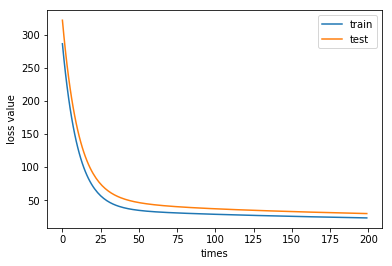

In [6]:
## 开始训练
loss_train = []
loss_test = []
if __name__ == '__main__':
    # 循环迭代200次
    for epoch in range(0, 200):
        # 分别计算训练集与验证集损失函数值
        loss_train = loss_func(w, X_train, y_train).A[0]
        print('Loss_train:', loss_train)
        loss_train.append(loss_train)
        loss_val = loss_func(w, X_val, y_val).A[0]
        print('Loss_val:', loss_val)
        loss_test.append(loss_val)
        w = step_gradient(w, X_train, y_train)
    # 可视化
    plt.plot(loss_train, label="train")
    plt.plot(loss_test, label="val")
    plt.xlabel("times")  # 横坐标名字
    plt.ylabel("loss value")  # 纵坐标名字
    plt.legend(loc="best")  # 图例
    plt.show()
